# Dimensionality Reduction by Extracting Principal Components

[Wine](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
import os
#os.chdir('..')
#os.chdir('..')
#os.getcwd()

In [5]:
df = pd.read_csv('Data\Wine\wine.csv')
df.shape

(178, 14)

In [6]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
X = df.iloc[:, 1:]

In [9]:
y = df['class']

## Part 1

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [43]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


**Do with just 2 principal components first**

In [17]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=2)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
pca.explained_variance_ratio_

array([0.35900066, 0.18691934])

In [46]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187]


In [47]:
pd.DataFrame(np.round(pca.components_, 3), columns=X.columns).T

,0,1
Alcohol,0.128,-0.493
Malic acid,-0.256,-0.190
Ash,-0.022,-0.317
Alcalinity of ash,-0.244,0.035
Magnesium,0.148,-0.262
Total phenols,0.385,-0.096
Flavanoids,0.420,-0.015
Nonflavanoid phenols,-0.299,-0.076
Proanthocyanins,0.308,-0.074
Color intensity,-0.119,-0.534


**Check all components**

In [49]:
pca = PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [50]:
pca.fit_transform(X_train_sc)

array([[-1.16602698, -3.61532732,  1.15128454, ..., -0.1121504 ,
         0.07147567, -0.75559169],
       [-3.86261156, -0.48217746,  1.72758428, ...,  0.50457041,
        -0.18288356, -0.122403  ],
       [ 2.28353786,  1.27503318, -0.13167658, ...,  0.48017987,
        -0.45893296,  0.41585049],
       ...,
       [ 4.22339048, -2.40345929, -1.13704654, ..., -0.12930554,
        -0.20588086, -0.04785505],
       [-1.80527275,  1.49091985, -0.08991142, ..., -0.50730299,
        -0.48437788,  0.46676777],
       [-0.07808699,  1.19327925,  1.04439979, ..., -0.24025144,
         0.05180158, -0.28153725]])

In [51]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187 0.116 0.074 0.067 0.049 0.042 0.027 0.023 0.019 0.017 0.013
 0.008]


In [52]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35900066, 0.54592   , 0.66198557, 0.73570273, 0.80224132,
       0.85078714, 0.89273756, 0.91957678, 0.94305138, 0.96194872,
       0.97910815, 0.99173743, 1.        ])

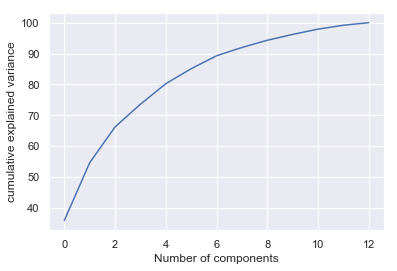

In [53]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100.)
plt.xlabel("Number of components");
plt.ylabel("cumulative explained variance");

***
Practice

### Abalone Data

8 features

Applying PCA, how many components would you need to explain 80% of variance?

In [66]:
df = pd.read_table('Data\Wine\\abalone.data', header=None, sep=',')
df.shape

(4177, 9)

In [67]:
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [70]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [73]:
sc = StandardScaler()
sc.fit(X)
X_sc = sc.transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
pca = PCA(n_components=None)

In [75]:
pca.fit(X_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [80]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.839 0.087 0.032 0.021 0.011 0.008 0.002 0.001]


In [82]:
print(np.cumsum(np.round(pca.explained_variance_ratio_, 3)))

[0.839 0.926 0.958 0.979 0.99  0.998 1.    1.001]


Only need 1 component to explain 80% variance.

***

## Part 2

In [83]:
df = pd.read_csv('Data\Wine\wine.csv')
df.shape

(178, 14)

In [84]:
X = df.iloc[:, 1:]
y = df['class']

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [86]:
pca = PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [93]:
res = pca.transform(X_train_sc)
index_name = ['PCA_'+str(k) for k in range(0, len(res))]

In [99]:
df1 = pd.DataFrame(res, columns=df.columns[1:], 
                   index=index_name)
df1.T.sort_values(by='PCA_0')


,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_132,PCA_133,PCA_134,PCA_135,PCA_136,PCA_137,PCA_138,PCA_139,PCA_140,PCA_141
Malic acid,-3.615327,-0.482177,1.275033,-2.496962,0.688203,2.225773,2.004699,0.202558,-0.350467,-1.194808,...,2.383573,1.254332,-0.285536,-2.655658,-0.851595,0.920966,2.108473,-2.403459,1.490920,1.193279
Alcohol,-1.166027,-3.862612,2.283538,-1.678507,1.572842,0.202555,0.883339,-0.715050,-2.315354,2.481817,...,-0.448901,1.892591,1.314532,-3.239215,3.106377,1.646677,-0.248324,4.223390,-1.805273,-0.078087
Proline,-0.755592,-0.122403,0.415850,-0.791136,0.353050,-0.047309,-0.331796,-0.217981,-0.332538,0.007792,...,-0.378883,-0.904471,1.420535,-0.276335,-0.050149,-0.251027,0.226736,-0.047855,0.466768,-0.281537
Proanthocyanins,-0.639966,-0.005981,-0.481336,-0.121445,0.251356,-0.434503,-0.483237,-1.153828,-0.604990,1.278853,...,0.659534,0.346474,-0.490850,-0.681130,-1.216004,-1.031495,0.541342,0.870520,0.374641,-0.361991
Flavanoids,-0.553745,1.257686,-0.979052,-0.666927,-0.078362,0.183285,-0.234952,0.277431,0.778538,0.296284,...,-0.385097,-1.490401,-0.787262,-0.092232,0.173484,-1.441185,-0.201445,0.889966,0.607321,-0.675202
Hue,-0.112150,0.504570,0.480180,-0.319599,0.309145,-0.233613,-0.557362,0.101598,0.138492,-0.265687,...,0.393101,1.018104,-0.241156,-0.066664,-0.410631,-0.277463,-0.385403,-0.129306,-0.507303,-0.240251
OD280/OD315 of diluted wines,0.071476,-0.182884,-0.458933,0.045823,-0.119233,-0.190320,0.272664,-0.916741,-0.284014,-0.131304,...,0.671307,-0.505715,0.902789,-0.162116,0.538444,-0.363199,0.594517,-0.205881,-0.484378,0.051802
Magnesium,0.221634,-0.226540,0.215798,-0.003420,-0.674013,0.689123,-0.303721,-1.649756,-0.507613,0.191238,...,-0.946465,0.858385,0.638835,-0.369685,0.736762,-0.838742,-0.363045,-0.673900,-1.215320,0.401311
Color intensity,0.262397,-0.453600,-0.777822,-0.123055,-0.275627,0.909094,0.166193,0.245809,-0.250217,-0.221972,...,-0.203160,-0.202517,-0.219869,-0.008425,0.530734,-0.487055,0.589346,-0.669495,0.603541,0.717003
Nonflavanoid phenols,0.918085,-0.113136,-0.678263,0.150849,-0.127387,-0.200097,0.302700,-1.188509,0.362818,0.236359,...,0.682362,-0.599961,-1.508226,0.505734,0.151646,1.878092,0.218571,0.285528,0.446454,-0.814767


This shows how components and features are related.